# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

pd.options.display.max_columns = None
pd.options.display.max_rows = None
matplotlib.style.use('ggplot') # Look Pretty

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [2]:
crimes = pd.read_csv('/Users/sander/Documents/course_PythonDataScience/Module5/Datasets/Crimes_-_2001_to_present.csv')
crimes.shape

(14230, 22)

Get rid of any _rows_ that have nans in them:

In [3]:
crimes.dropna(axis=0, inplace=True)
crimes.shape

(13011, 22)

Display the `dtypes` of your dset:

In [11]:
crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [13]:
crimes.Date = pd.to_datetime(crimes.Date)

In [22]:
crimes[0:2]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,2006-02-09 22:29:07,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,421,4,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,2006-02-01 12:30:27,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,1122,11,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"


In [52]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    df = df[['Longitude', 'Latitude']]

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    kmeans = KMeans(n_clusters=7)
    model = kmeans.fit(df)

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='blue', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.7096227   41.87810882]
 [-87.6195112   41.80346598]
 [-87.63108338  41.69664745]
 [-87.68540588  41.9813113 ]
 [-87.75695824  41.89331522]
 [-87.58253297  41.75256823]
 [-87.66471781  41.77274359]]


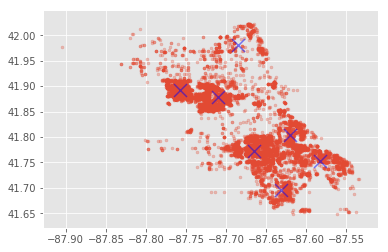

In [53]:
# Print & Plot your data
doKMeans(crimes)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [60]:
# print(crimes.shape)
crimes_2011 = crimes[crimes.Date > '2011-01-01']

[[-87.75477425  41.88993613]
 [-87.61888255  41.79210152]
 [-87.6647826   41.77567273]
 [-87.71062999  41.87536943]
 [-87.63485385  41.7054848 ]
 [-87.57999513  41.75033989]
 [-87.68692804  41.98387683]]


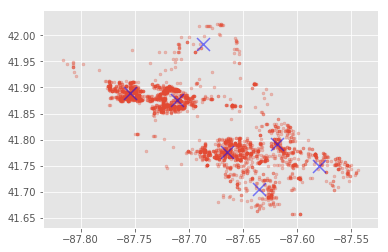

In [70]:
# Print & Plot your data
doKMeans(crimes_2011)